In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dat=pd.read_clipboard(header=0,squeeze=True)

In [3]:
dat.tail()

,direction,pe,dv,retALSI,lag
6037,1,4.615059,-1.346822,1.629155,1.629155
6038,1,-0.437425,-0.339559,0.135424,0.135424
6039,1,1.065902,-1.025650,1.013595,1.013595
6040,1,1.006961,-1.384105,1.448496,1.448496
6041,1,0.665718,-0.699304,0.641149,0.641149


In [4]:
Y=dat['direction']

In [5]:
X=dat.drop(['retALSI','direction'],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
fclf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
RFclass=fclf.fit(X_train, Y_train)

# Feature Importance i.e. Variable Importance ONLY FOR Tree Based 

[0.2815893  0.36517594 0.35323476]


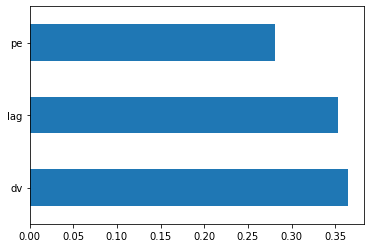

In [23]:
print(RFclass.feature_importances_)##
feat_importances = pd.Series(RFclass.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Prediction

In [12]:
# Predicting the Test set results
y_pred = RFclass.predict(X_test)

# Confusion Matrix

In [13]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[900   0]
 [  1 912]]


# Classification metrics: recall, F-score, precision

In [14]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      1.00      1.00       913

    accuracy                           1.00      1813
   macro avg       1.00      1.00      1.00      1813
weighted avg       1.00      1.00      1.00      1813



# ROC Curve

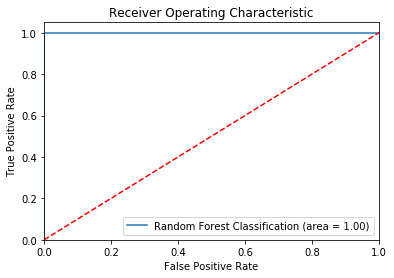

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RF_roc_auc = roc_auc_score(Y_test, RFclass.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, RFclass.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classification (area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")